## Contemporary Music Recommendation System using Historical Preferences

### Overview

Many of us who are at the age when AARP cards arrive in the mail are still listening to the music of our highschool and college days. Exposure to new music has diminished due to the decreased use of the radio as part of our daily routines.  Spotify, iTunes, Pandora, and other music apps provide a plethora of music options, and they make recommendations for other music based on a playlist, but most often those recommendations are of the same time period and genre.  


#### Problem
Many of us would like to try new music, but don’t know where to start, and don’t have the patience or time to research or listen to new music as a hit or miss exercise.

#### Solution
My objective is to develop a recommendation system to highlight new songs and artists for listeners based on their  historical music preferences.



### Project Setup

#### Import Tools

This project includes obtaining the album and track audio features of songs from the 80s and 90s. These songs were found by identifying Spotify playlists representing music of different genres from this timeframe.  In order to import, process, and build a model using these data, I am importing the following tools.  

In [517]:
import pandas as pd
import io, sys, os
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from itertools import chain
import re
import http.client
import sys
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.datasets import make_blobs, make_moons, load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from copy import deepcopy
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from bs4 import BeautifulSoup
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import adjusted_rand_score


#### Establish connection to Spotify's API

In [380]:
import http.client

con = http.client.HTTPConnection('https://api.spotify.com', 80, timeout=100)

print(con)

In [381]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util


OLD CODE

with open("API.txt", encoding="utf-8-sig") as f:
    secret_ls = f.readlines()
    cid = secret_ls[0][:-1]
    secret = secret_ls[1]
        

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)
    
playlist_link = "https://open.spotify.com/playlist/1Hno5OKWwHag0fuRBrXzWL?si=38095674156049c6"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]
track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]


In [382]:
with open("API.txt", encoding="utf-8-sig") as f:
    secret_ls = f.readlines()
    cid = secret_ls[0][:-1]
    secret = secret_ls[1]
        

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [384]:
# Delete track_data if importing new dataset
track_data = []

In [385]:
with open("URL2.txt") as g:
    for url in g:
        playlist_link = url
        playlist_URI = playlist_link.split("/")[-1].split("?")[0]
        
        for track in sp.playlist_tracks(playlist_URI)["items"]:
            #URI
            track_uri = track["track"]["uri"]
    
            #Track name
            track_name = track["track"]["name"]
    
            #Main Artist
            artist_uri = track["track"]["artists"][0]["uri"]
            artist_info = sp.artist(artist_uri)
    
            #Name, popularity, genre (the first 6 genres in alphabetical order)
            artist_name = track["track"]["artists"][0]["name"]
            artist_pop = artist_info["popularity"]
            artist_genre_1 = artist_info["genres"][0:1]
            artist_genre_2 = artist_info["genres"][1:2]
            artist_genre_3 = artist_info["genres"][2:3]
            artist_genre_4 = artist_info["genres"][3:4]
            artist_genre_5 = artist_info["genres"][4:5]
            artist_genre_6 = artist_info["genres"][5:6]
    
            #Album
            album = track["track"]["album"]["name"]
            album_date = track["track"]["album"]["release_date"]
    
            #Popularity of the track
            track_pop = track["track"]["popularity"]
    
            #Track features
            danceability = sp.audio_features(track_uri)[0]['danceability']
            acousticness = sp.audio_features(track_uri)[0]['acousticness']
            energy = sp.audio_features(track_uri)[0]['energy']
            instrumentalness = sp.audio_features(track_uri)[0]['instrumentalness']
            key = sp.audio_features(track_uri)[0]['key']
            liveness = sp.audio_features(track_uri)[0]['liveness']
            loudness = sp.audio_features(track_uri)[0]['loudness']
            mode = sp.audio_features(track_uri)[0]['mode']
            speechiness = sp.audio_features(track_uri)[0]['speechiness']
            tempo = sp.audio_features(track_uri)[0]['tempo']
            valence = sp.audio_features(track_uri)[0]['valence']
    
            #List of Dictionary and audio feature items
            track_data = [
                track_uri, 
                track_name, 
                artist_name, 
                artist_pop, 
                artist_genre_1, 
                artist_genre_2, 
                artist_genre_3,
                artist_genre_4, 
                artist_genre_5, 
                artist_genre_6, 
                album, 
                album_date, 
                danceability, 
                acousticness, 
                energy, 
                instrumentalness, 
                key, 
                liveness, 
                loudness, 
                mode, 
                speechiness, 
                tempo, 
                valence]
    
            #Append track_data to data list
            data.append(track_data)

ConnectionError: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))

In [491]:
len(data)

4434

In [492]:
# Convert dictionary (data) into pandas dataframe (df)
df = pd.DataFrame.from_dict(data)

In [493]:
# Update column headers

df.columns = ['track_uri', 
        'track_name', 
        'artist_name', 
        'artist_pop', 
        'artist_genre_1', 
        'artist_genre_2', 
        'artist_genre_3',
        'artist_genre_4', 
        'artist_genre_5', 
        'artist_genre_6', 
        'album', 
        'album_date', 
        'danceability', 
        'acousticness', 
        'energy', 
        'instrumentalness', 
        'key', 
        'liveness', 
        'loudness', 
        'mode', 
        'speechiness', 
        'tempo', 
        'valence']

In [494]:
df['album_date'] = pd.to_datetime(df['album_date'])

In [495]:
df['album_date']

0      1995-10-02
1      1991-03-12
2      1997-09-29
3      1995-01-01
4      1993-01-01
          ...    
4429   1982-06-07
4430   1988-09-13
4431   1982-05-01
4432   1983-02-22
4433   1980-02-25
Name: album_date, Length: 4434, dtype: datetime64[ns]

In [496]:
df

track_uri  \
0     spotify:track:1qPbGZqppFwLwcBC1JQ6Vr   
1     spotify:track:31AOj9sFz2gM0O3hMARRBx   
2     spotify:track:57iDDD9N9tTWe75x6qhStw   
3     spotify:track:1d6KS9GH06JAd19uiBy9IE   
4     spotify:track:5DiXcVovI0FcY2s0icWWUu   
...                                    ...   
4429  spotify:track:07TnWCHrFkvF61GzJuLVt0   
4430  spotify:track:07HqIg8BnB1lJElnw2ZiSR   
4431  spotify:track:6N7gPTru90HYLRUIVDQ185   
4432  spotify:track:57ebBLITHpRgRKGrlbxMZS   
4433  spotify:track:7dQC53NiYOY9gKg3Qsu2Bs   

                                            track_name        artist_name  \
0                                           Wonderwall              Oasis   
1                                   Losing My Religion             R.E.M.   
2                                Bitter Sweet Symphony          The Verve   
3                               Ironic - 2015 Remaster  Alanis Morissette   
4                                            Mr. Jones     Counting Crows   
...                                                ...                ...   
4429  Hard to Say I'm Sorry / Get Away - 2006 Remaster            Chicago   
4430                             I'll Be There For You           Bon Jovi   
4431                                    More Than This         Roxy Music   
4432                                        Faithfully            Journey   
4433                                   All Out of Love         Air Supply   

      artist_pop      artist_genre_1                artist_genre_2  \
0             75        [beatlesque]                     [britpop]   
1             72  [alternative rock]                [athens indie]   
2             65  [alternative rock]                     [britpop]   
3             67      [canadian pop]  [canadian singer-songwriter]   
4             67  [alternative rock]                  [neo mellow]   
...          ...                 ...                           ...   
4429          67   [adult standards]                  [album rock]   
4430          77        [glam metal]                        [rock]   
4431          60        [album rock]                    [art rock]   
4432          74        [album rock]                [classic rock]   
4433          67       [mellow gold]                   [soft rock]   

        artist_genre_3       artist_genre_4       artist_genre_5  \
0         [madchester]     [permanent wave]               [rock]   
1     [permanent wave]           [pop rock]               [rock]   
2     [permanent wave]           [pop rock]               [rock]   
3           [pop rock]  [singer-songwriter]                   []   
4           [pop rock]               [rock]  [singer-songwriter]   
...                ...                  ...                  ...   
4429    [classic rock]          [folk rock]        [mellow gold]   
4430                []                   []                   []   
4431    [classic rock]          [glam rock]        [melancholia]   
4432       [hard rock]        [mellow gold]               [rock]   
4433                []                   []                   []   

     artist_genre_6  ... acousticness energy  instrumentalness  key  liveness  \
0                []  ...      0.00236  0.854          0.000000    2    0.1330   
1                []  ...      0.17900  0.855          0.000001    9    0.0987   
2        [shoegaze]  ...      0.03350  0.917          0.000000    9    0.4060   
3                []  ...      0.21800  0.582          0.000000   11    0.1590   
4                []  ...      0.18300  0.817          0.000003    0    0.2850   
...             ...  ...          ...    ...               ...  ...       ...   
4429    [soft rock]  ...      0.05600  0.570          0.001250    4    0.0606   
4430             []  ...      0.05320  0.727          0.000000    2    0.1030   
4431  [mellow gold]  ...      0.05080  0.666          0.046600    6    0.1390   
4432    [soft rock]  ...      0.09790  0.644          0.000000   11    0.1090   
4433  

In [497]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4434 entries, 0 to 4433
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   track_uri         4434 non-null   object        
 1   track_name        4434 non-null   object        
 2   artist_name       4434 non-null   object        
 3   artist_pop        4434 non-null   int64         
 4   artist_genre_1    4434 non-null   object        
 5   artist_genre_2    4434 non-null   object        
 6   artist_genre_3    4434 non-null   object        
 7   artist_genre_4    4434 non-null   object        
 8   artist_genre_5    4434 non-null   object        
 9   artist_genre_6    4434 non-null   object        
 10  album             4434 non-null   object        
 11  album_date        4434 non-null   datetime64[ns]
 12  danceability      4434 non-null   float64       
 13  acousticness      4434 non-null   float64       
 14  energy            4434 n

In [498]:
df.describe()

artist_pop  danceability  acousticness       energy  instrumentalness  \
count  4434.000000   4434.000000   4434.000000  4434.000000       4434.000000   
mean     60.134867      0.607860      0.134774     0.729919          0.070911   
std      14.917832      0.151757      0.181272     0.186954          0.202987   
min       0.000000      0.062100      0.000002     0.008060          0.000000   
25%      54.000000      0.505250      0.007830     0.611250          0.000000   
50%      62.000000      0.622000      0.054450     0.766000          0.000078   
75%      71.000000      0.715750      0.198750     0.882000          0.006920   
max      89.000000      0.988000      0.993000     0.999000          0.987000   

               key     liveness     loudness         mode  speechiness  \
count  4434.000000  4434.000000  4434.000000  4434.000000  4434.000000   
mean      5.283717     0.185062    -7.870647     0.678394     0.065387   
std       3.601234     0.144842     3.410926     0.467145     0.063804   
min       0.000000     0.011600   -27.706000     0.000000     0.022400   
25%       2.000000     0.085300    -9.582250     0.000000     0.033500   
50%       5.000000     0.129500    -7.269000     1.000000     0.042200   
75%       8.000000     0.258000    -5.485250     1.000000     0.063700   
max      11.000000     0.969000    -0.140000     1.000000     0.590000   

             tempo      valence  
count  4434.000000  4434.000000  
mean    122.279047     0.619495  
std      26.862131     0.229879  
min      58.396000     0.037600  
25%     101.368000     0.458000  
50%     121.138000     0.646000  
75%     136.805750     0.806750  
max     208.571000     0.980000

array([[<AxesSubplot:title={'center':'artist_pop'}>,
        <AxesSubplot:title={'center':'album_date'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>],
       [<AxesSubplot:title={'center':'valence'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

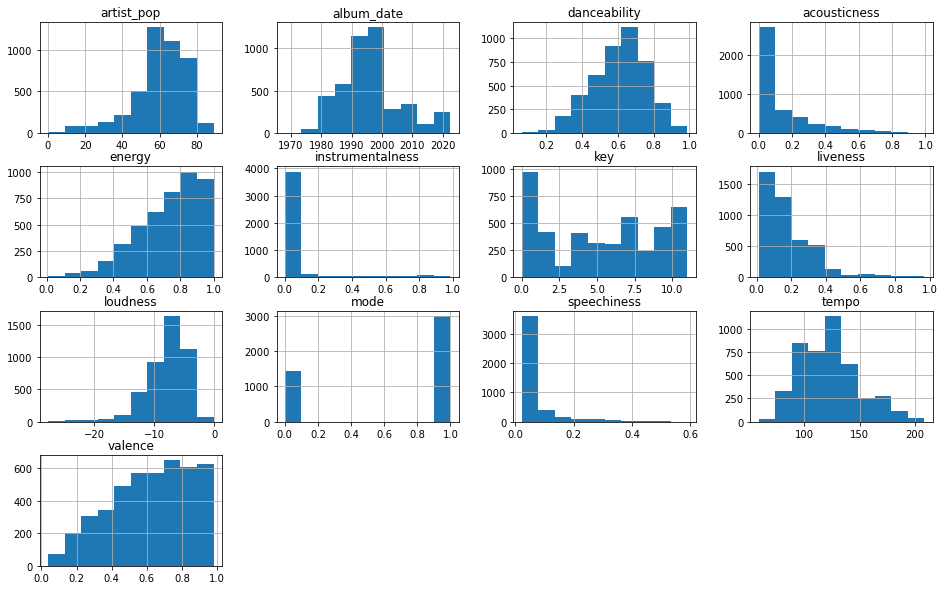

In [499]:
df.hist(figsize = (16,10))

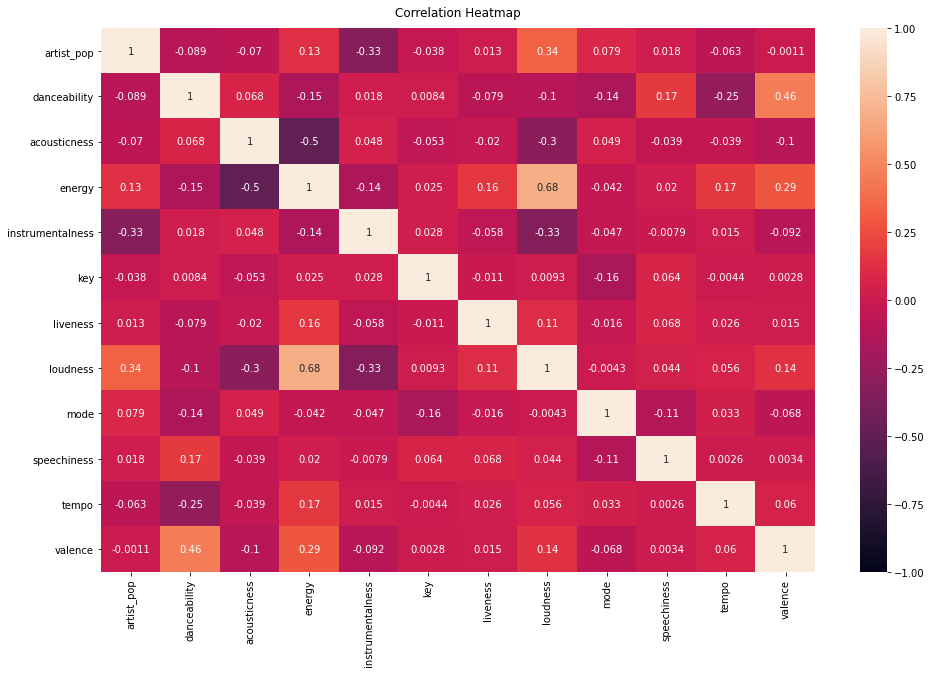

In [500]:
plt.figure(figsize = (16,10))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


Create clusters by track

In [546]:
cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                             ('kmeans', KMeans(n_clusters=5, n_init=1,
                              verbose=2))], verbose=True)

X = df.select_dtypes(np.number)
number_cols = list(X.columns)
cluster_pipeline.fit(X)

cluster_labels = cluster_pipeline.predict(X)
df['cluster_label'] = cluster_labels


Create Clusters by Track using KMeans

In [547]:
# setting verbose = 2 to display and plot inertia values

def train_kmeans(X):
    kmeans = KMeans(n_clusters=8, verbose=2, max_iter=None, n_init=1) #<-- init=1, verbose=2
    kmeans.fit(X)
    return kmeans

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

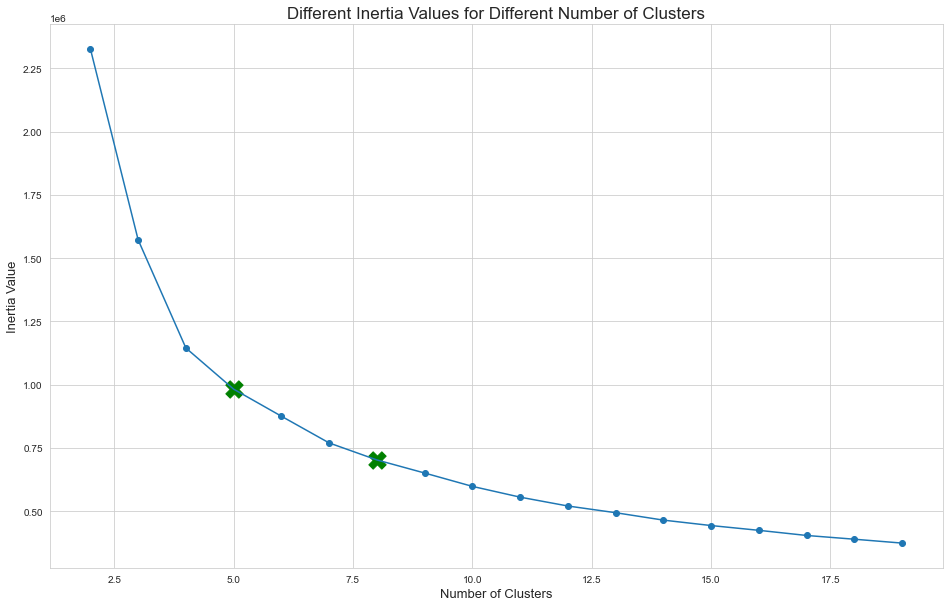

In [548]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16,10]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

inertia_list = []
for n in range(2, 20):
    kmeans_model = KMeans(n_clusters=n, init="k-means++")
    kmeans_model.fit(X)
    inertia_list.append(kmeans_model.inertia_)
    
# plot the inertia curve
plt.plot(range(2,20),inertia_list)
plt.scatter(range(2,20),inertia_list)
plt.scatter(5, inertia_list[3], marker="X", s=300, c="g")
plt.scatter(8, inertia_list[6], marker="X", s=300, c="g")
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters", size=17)

In [549]:
number_cols

['artist_pop',
 'danceability',
 'acousticness',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'valence',
 'cluster_label']

Visualizing the clusters

In [550]:
from sklearn.decomposition import PCA

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components = 2))])
track_embedding = pca_pipeline.fit_transform(X)

projection = pd.DataFrame(columns=['x', 'y'], data=track_embedding)
projection['title'] = df['artist_genre_1']
projection['cluster'] = df['cluster_label']

In [551]:
import plotly.express as px
fig = px.scatter(
    projection, color='cluster', x='x', y='y', hover_data=['x','y','title'])
fig.show()

In [545]:
df['cluster_label'].value_counts()


7    1241
6     880
3     611
0     610
1     507
2     251
4     244
5      90
Name: cluster_label, dtype: int64

For n_clusters = 2 The average silhouette_score is : 0.7014544488122533
For n_clusters = 3 The average silhouette_score is : 0.592746417212403
For n_clusters = 4 The average silhouette_score is : 0.630318316347581
For n_clusters = 5 The average silhouette_score is : 0.547576370569481
For n_clusters = 6 The average silhouette_score is : 0.4282057178687163
For n_clusters = 7 The average silhouette_score is : 0.34921816543967704
For n_clusters = 8 The average silhouette_score is : 0.32322846321974125
For n_clusters = 9 The average silhouette_score is : 0.32607281180953496
For n_clusters = 10 The average silhouette_score is : 0.32632499367612267
For n_clusters = 11 The average silhouette_score is : 0.3354644885516518
For n_clusters = 12 The average silhouette_score is : 0.33630904058255584
For n_clusters = 13 The average silhouette_score is : 0.33025214271672665
For n_clusters = 14 The average silhouette_score is : 0.334682003635935
For n_clusters = 15 The average silhouette_score is : 0.3

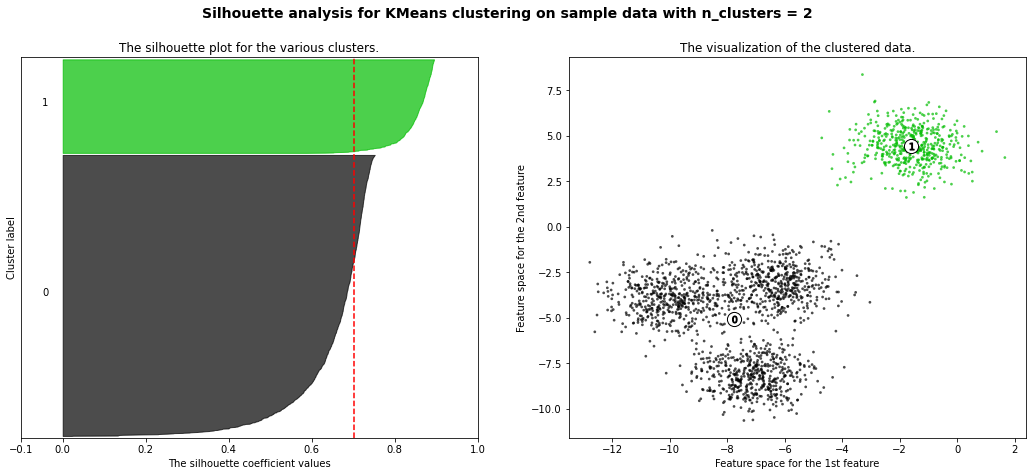

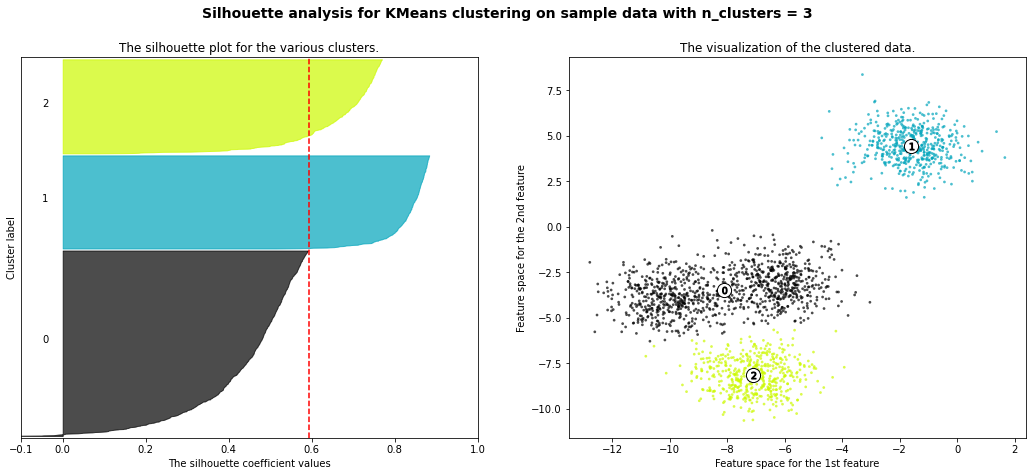

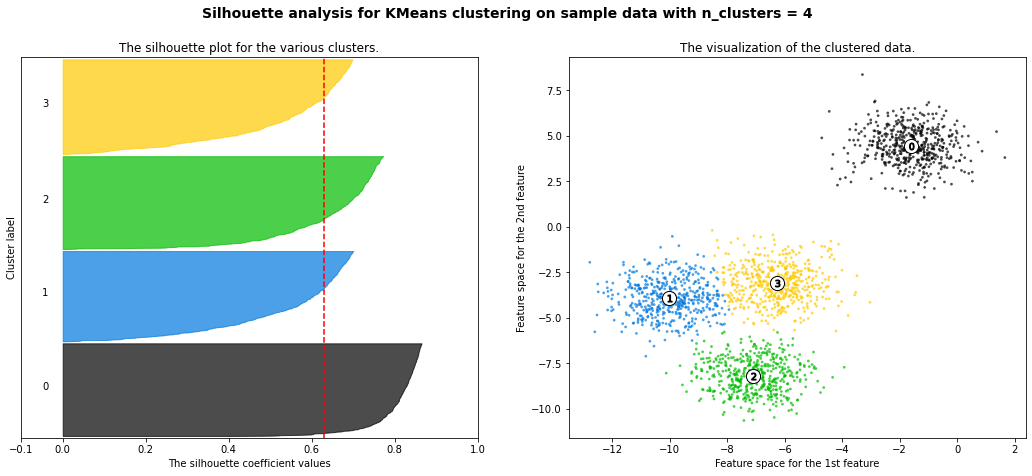

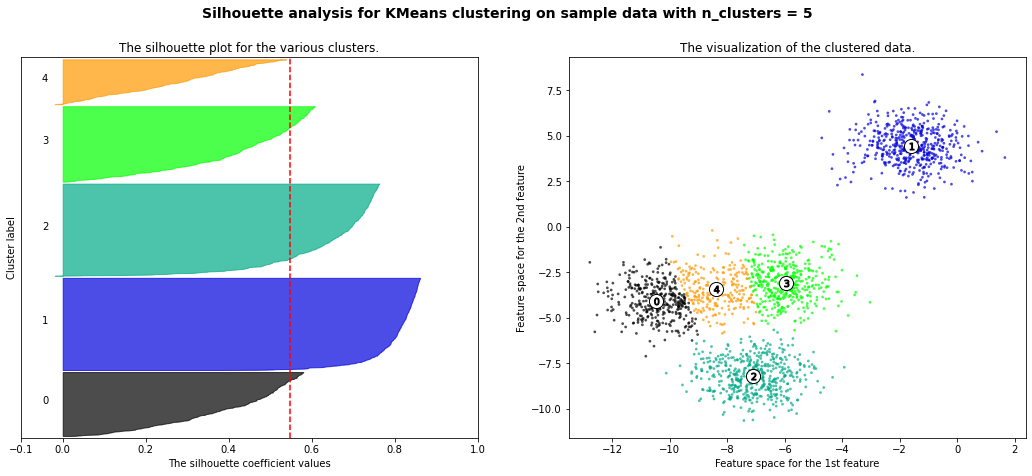

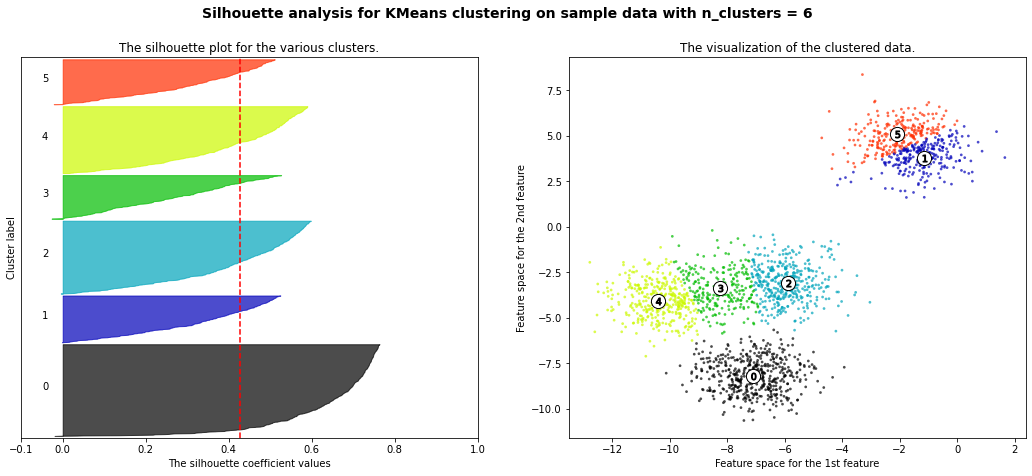

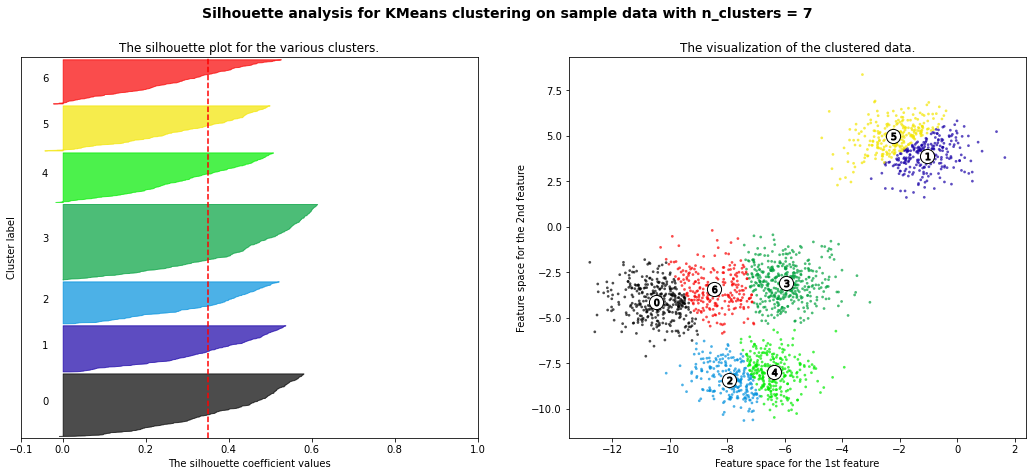

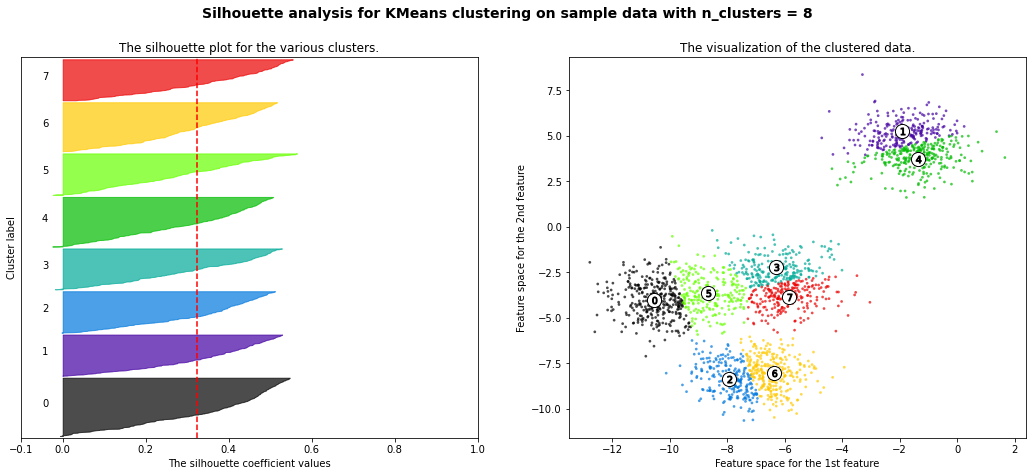

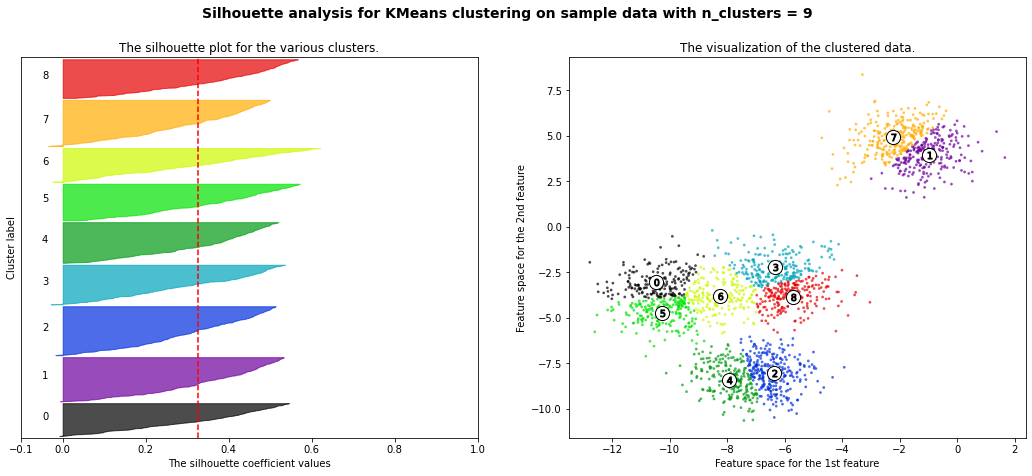

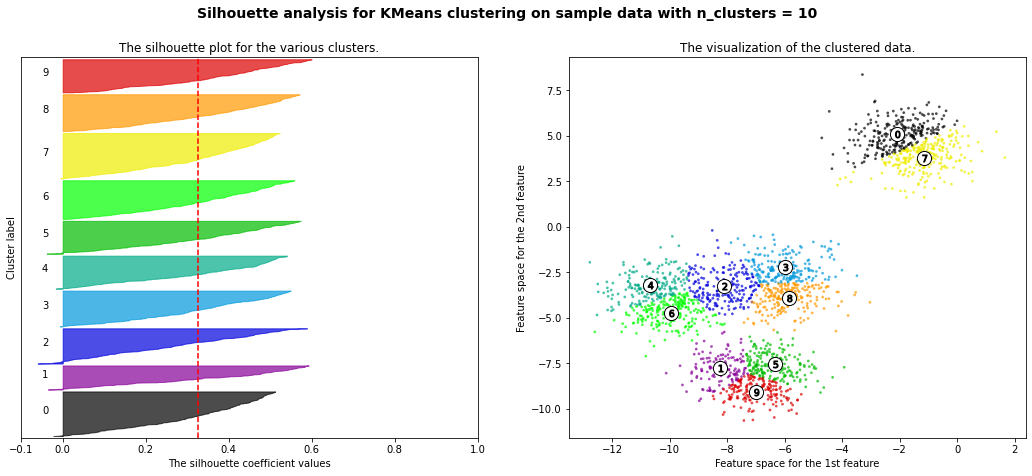

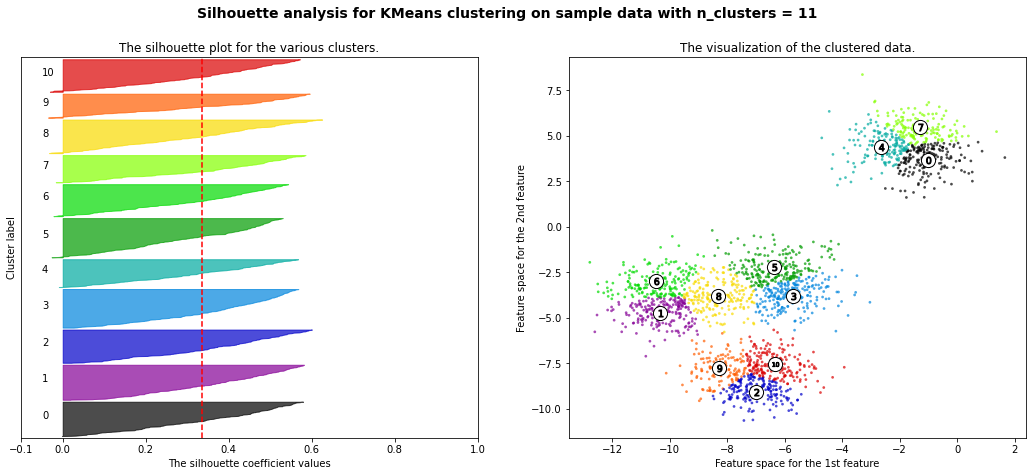

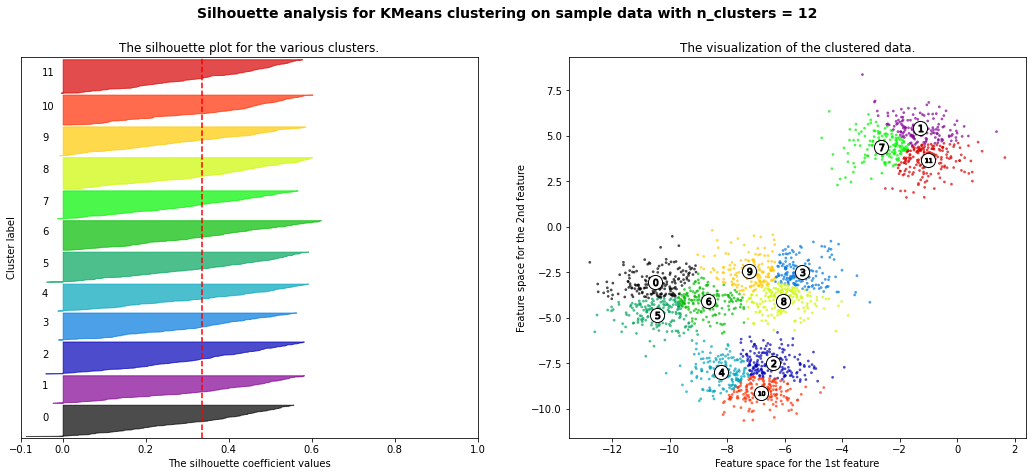

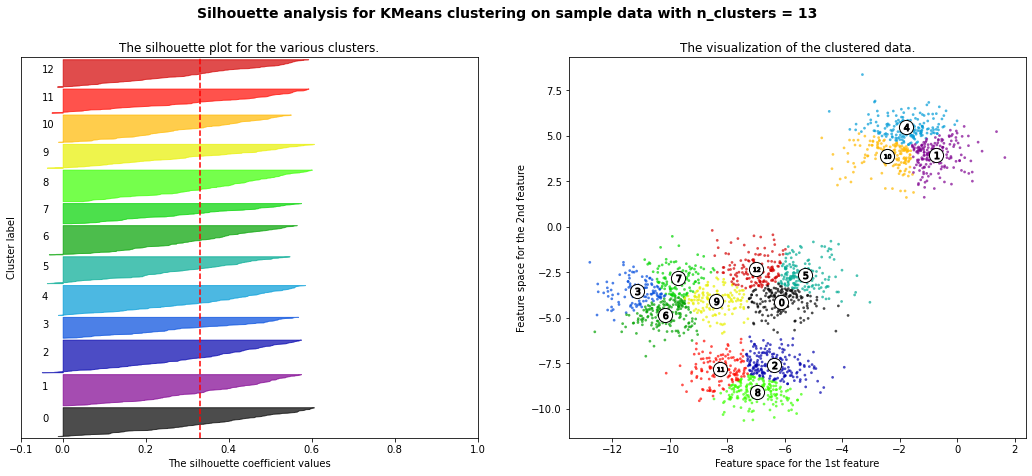

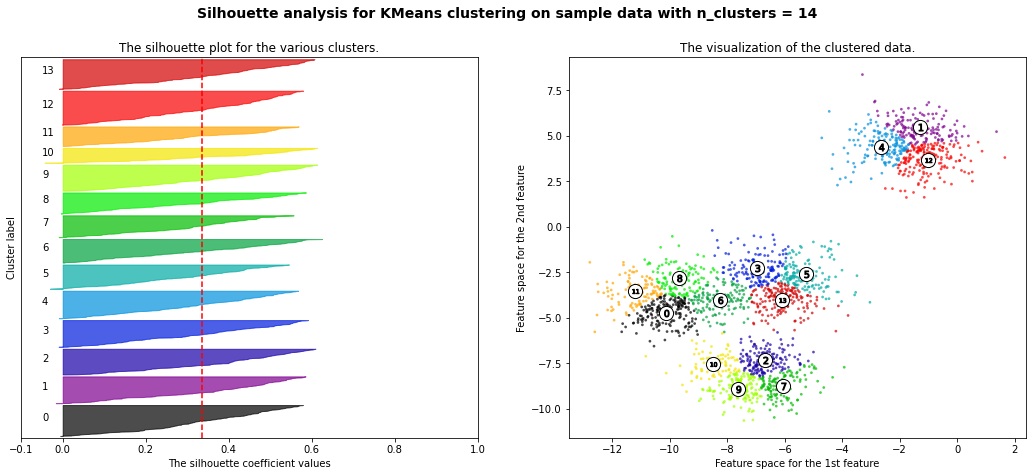

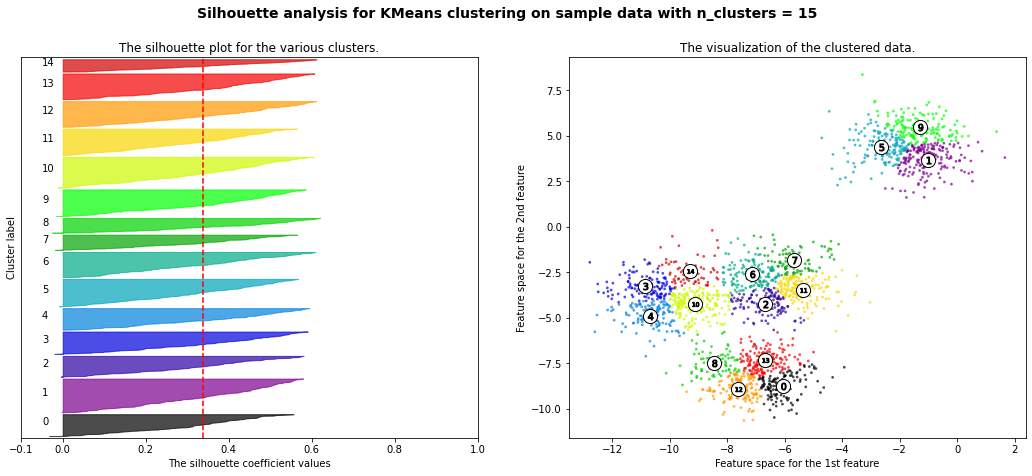

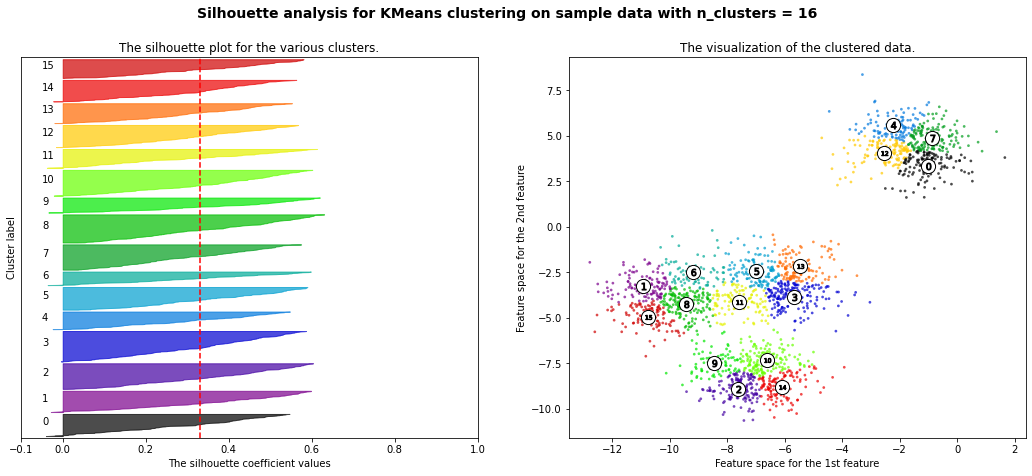

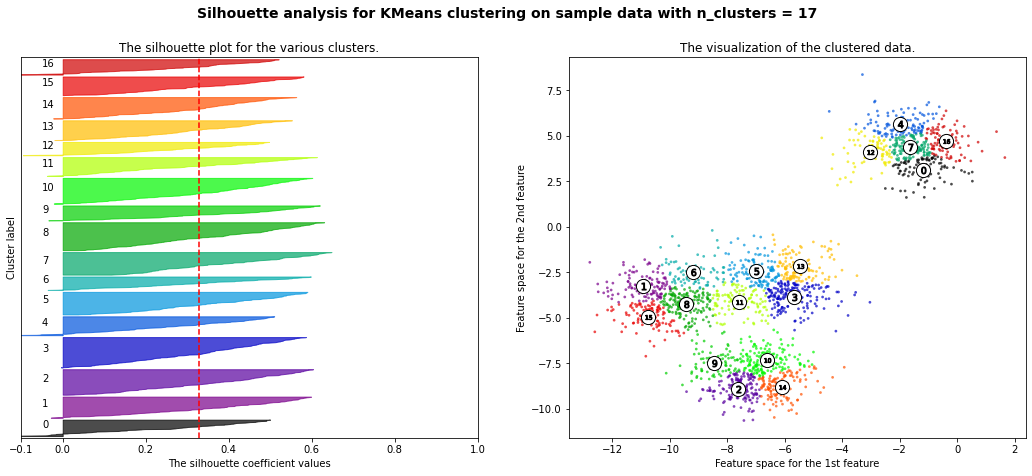

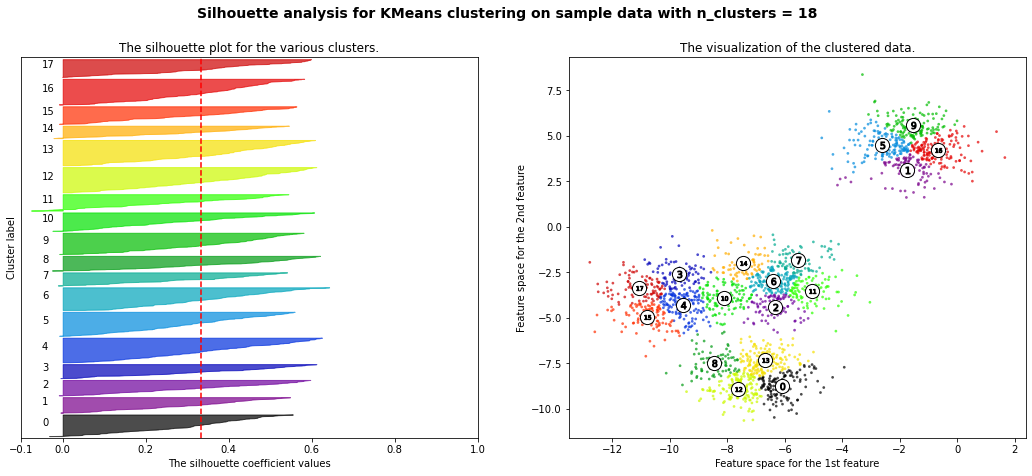

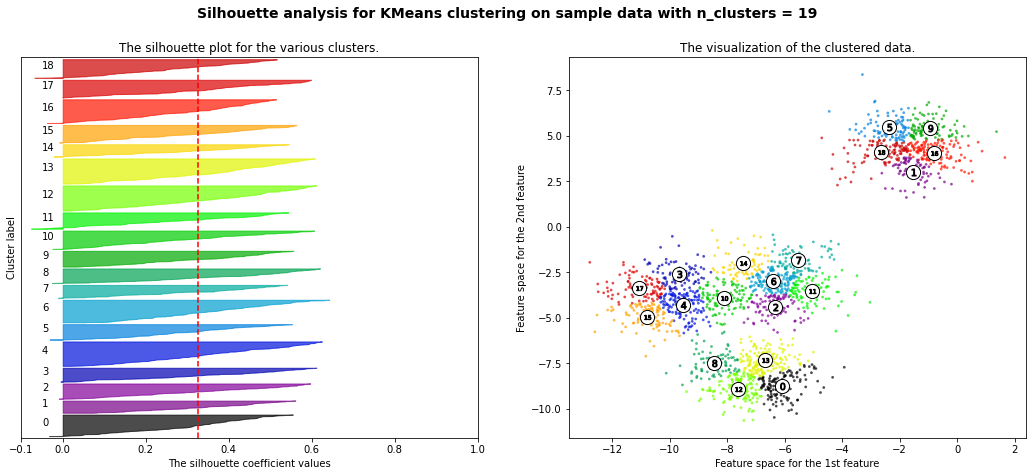

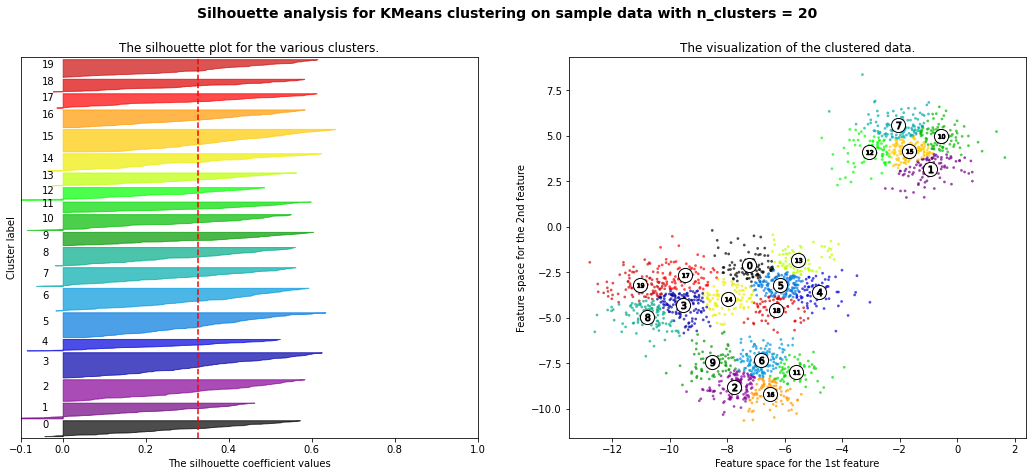

In [508]:
# Calculating Silhouette Score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

%matplotlib inline

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
      silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [510]:
# Lasso data now with cluster labels

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model

    distortions.append(sum(np.min(cdist(X, centers,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(KMeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, centers,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = Kmeans.inertia_

AttributeError: type object 'KMeans' has no attribute 'inertia_'

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score


Generating song recommendations using cdist and cosine

In [421]:
from collections import defaultdict
from scipy.spatial.distance import cdist
import difflib

number_cols = ['valence', 'acousticness', 'danceability', 'energy','instrumentalness', 
'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'artist_pop']

In [422]:
number_cols

['valence',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'artist_pop']

In [419]:


def get_track_data(track, df):
    

# Gets the song data for a specific song. The song argument takes the form of a dictionary with 
# key-value pairs for the name and release year of the song.
    
    try:
        song_data = df[(df['track_name'] == track['track_name']) 
                                & (df['album_date'] == song['album_date'])].iloc[0]
        return song_data
    
    except IndexError:
        return find_song(track['track_name'], song['album_date'])
        

def get_mean_vector(song, df):
    
# gets the mean vector for a list of songs
    
    song_vectors = []
    
    for song in df:
        song_data = get_song_data(song, df)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(track['album_name']))
            continue
        song_vector = song_data[number_cols].values()
        song_vectors.append(song_vector)  
    
    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)

def flatten_dict_list(dict_list):
   
    """
    Utility function for flattening a list of dictionaries.
    """
    
    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []
    
    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)
            
    return flattened_dict
        

def recommend_songs(song_list, df, n_songs=10):
  
    """
    Recommends songs based on a list of previous songs that a user has listened to.
    """
    
    metadata_cols = ['name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)
    
    song_center = get_mean_vector(song_list, df)
    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(df[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])
    
    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return rec_songs[metadata_cols].to_dict(orient='records')

In [420]:
song_data

NameError: name 'song_data' is not defined